# Some intro

Some description



## Coordinate conversion

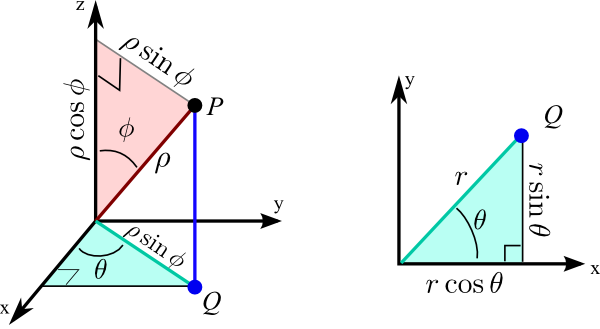

In [57]:
from IPython.display import Image
Image(filename='img/spherical-coordinate-system.png', width=400)

Convert from 3D spherical to cartesian coordinates:

$$ r = \rho \sin{\phi} $$
$$ x = r \cos{\theta} $$
$$ y = r \sin{\theta} $$
$$ z = \rho \cos{\phi} $$

Convert from 3D cartesian to spherical coordinates:

$$ \theta = \arctan{\frac{y}{x}} $$
$$ r = \sqrt{x^2 + y^2} $$
$$ \rho = \sqrt{x^2 + y^2 + z^2} $$
$$ \phi = \arctan{\frac{r}{\rho}} $$

In [58]:
import numpy as np

def sph2cart(points: np.ndarray) -> np.ndarray:
	rho, theta, phi = points.transpose()
	r = rho * np.sin(phi)
	x = r * np.cos(theta)
	y = r * np.sin(theta)
	z = rho * np.cos(phi)
	return np.array([x,y,z]).transpose()

def cart2sph(points: np.ndarray) -> np.ndarray:
	x, y, z = points.transpose()
	r = np.sqrt(x**2 + y**2)
	rho = np.sqrt(x**2 + y**2 + z**2)
	theta = np.arctan2(y, x)
	phi = np.arctan2(r, z)
	return np.array([rho, theta, phi]).transpose()

points = np.random.rand(5,3)

print(sph2cart(points[0]))
print(cart2sph(points[0]))

print(sph2cart(points[:]))
print(cart2sph(points[:]))

[0.01100527 0.00411097 0.01331087]
[0.8068507  1.52117554 0.45963403]
[[0.01100527 0.00411097 0.01331087]
 [0.66196174 0.31269933 0.54840728]
 [0.15794298 0.23806454 0.94681962]
 [0.53863633 0.1749329  0.60349205]
 [0.09931037 0.0510442  0.21315   ]]
[[0.8068507  1.52117554 0.45963403]
 [1.3756609  0.4495101  0.83051143]
 [1.42626973 0.78339377 1.36385473]
 [1.16254934 0.36265403 0.8654902 ]
 [0.71844817 1.10170562 0.83435115]]


# Solar position

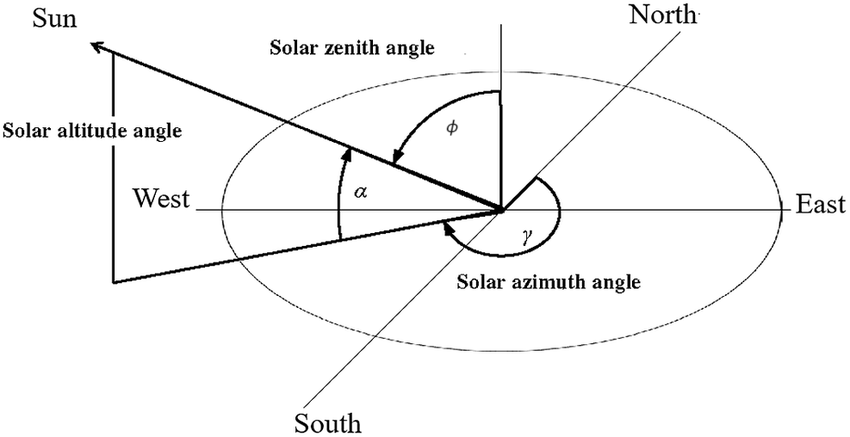

In [59]:
Image(filename='img/solar_position_diagram.png', width=400)

$$ \theta = 90 \degree - \gamma $$
$$ \phi + \alpha = 90 \degree $$

## Shadow position



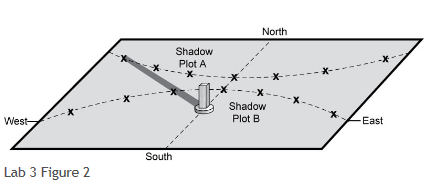

In [60]:
Image(filename='img/shadow_path.png', width=400)

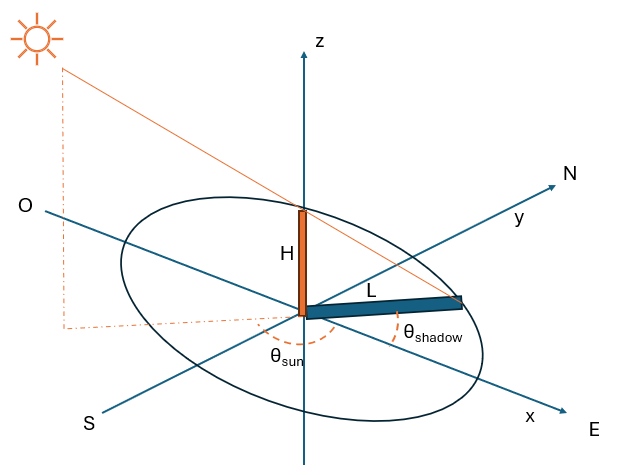

In [61]:
Image(filename='img/shadow_diagram.png', width=400)

The shadow angle is always $ 180 \degree $ offset from the sun:

$$ \theta_{shadow} = \theta_{sun} + 180 \degree $$

The length of the shadow is:

$$ L = \frac{H}{\tan{\alpha}} $$

Shadow position in 3D polar coordinates:

$$ \vec{r} = (L, \theta_{shadow}, 90 \degree ) $$

Shadow position in 3D cartesian coordinates:

$$ \vec{r} = (L \cos{\theta_{shadow}}, L \sin{\theta_{shadow}}, 0 ) $$

For the shadow calculation, make sure that the sun is always above the horizon.

## Incidence calculation

The incidence angle can be calculated using the dot product formula:

$$ \cos{\theta_{inc}} = \frac{\vec{r}_{sun} \cdot \vec{r}_{pv}}{|\vec{r}_{sun}||\vec{r}_{pv}|} $$

This also corresponds to the projected area from the sun's perspective.

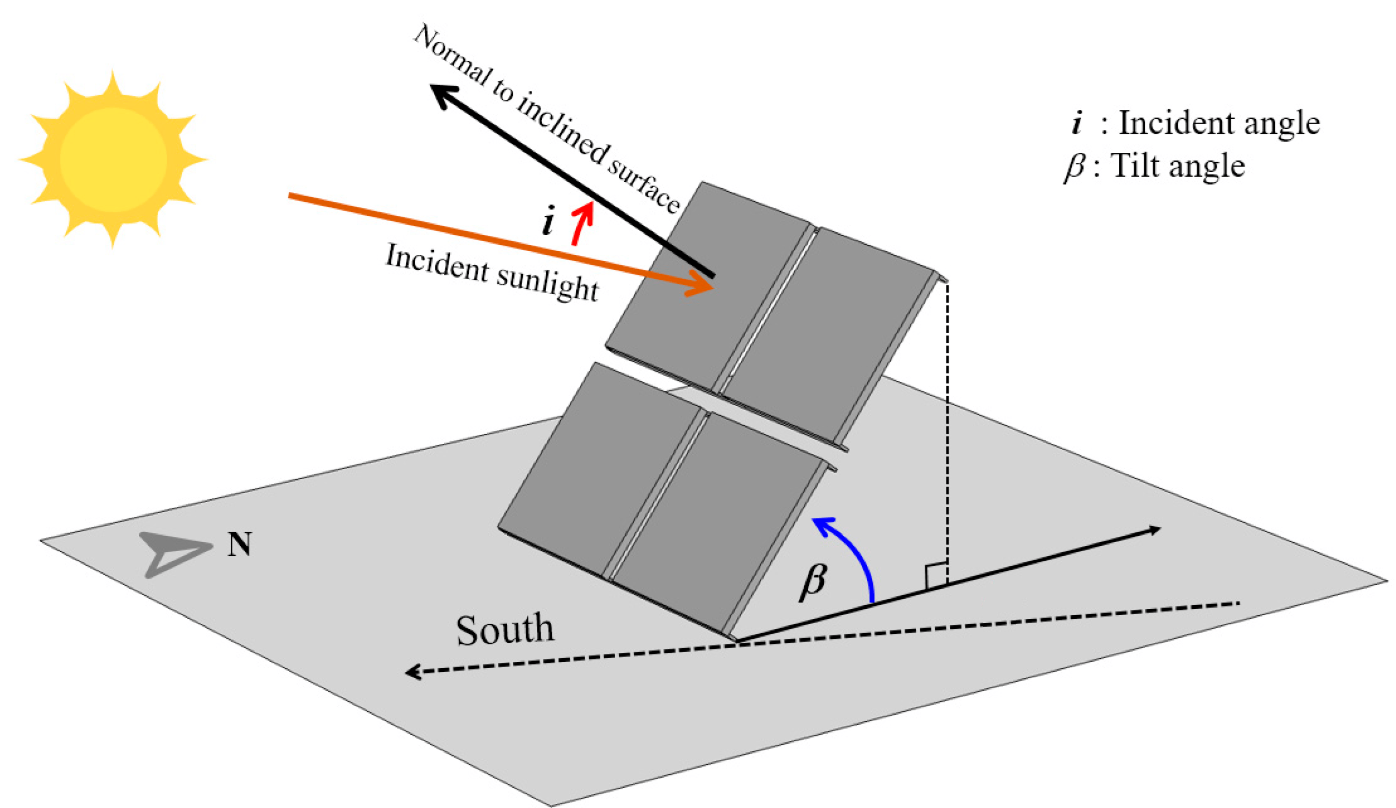

In [62]:
Image(filename='img/incidence_diagram.png', width=400)

In [63]:
v1 = np.random.rand(5,3)
v2 = np.random.rand(5,3)

def angle_between(u: np.ndarray, v: np.ndarray) -> np.ndarray:
    ux, uy, uz = u.transpose()
    vx, vy, vz = v.transpose()
    umag = np.sqrt(ux**2 + uy**2 + uz**2)
    vmag = np.sqrt(vx**2 + vy**2 + vz**2)
    u_dot_v = ux*vx + uy*vy + uz*vz
    return np.arccos( u_dot_v / (umag * vmag) )

angle = angle_between(v1[0], v2[0])
print(angle)
angle = angle_between(v1[:], v2[:])
print(angle)

0.7599975387982947
[0.75999754 0.54098967 0.65117553 0.58974921 0.46658636]


## Solar position

This page on [wikipedia](https://en.wikipedia.org/wiki/Position_of_the_Sun) explains clearly how to derive solar position for any date, time and place on earth. TBH, it looks like too much work. So maybe we will just stick with PVLIB or PYSOLAR.

## IAM losses



## Row shadings

Regarding row shadings there are two pieces of information that we are interested in: 

1. What is the critical solar altitude at which adjacent rows start to cast a shadow on each other?
1. After that critical point, what fraction of the the module is shaded for some given solar altitude?

### Critical solar altitude

The diagram below shows how the critical solar altitude can be calculated for any row configuration.

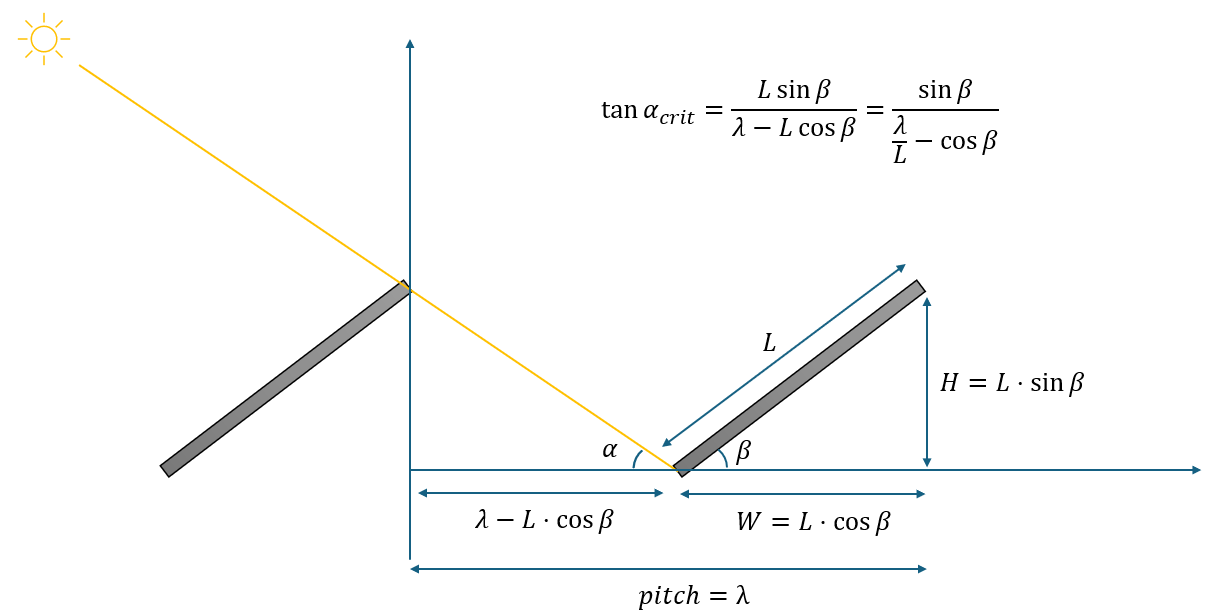

15.568697617872656
[15.56869762 16.01722349 18.99079826 16.49564253 20.21763869]


In [64]:
from IPython.display import display

display(Image(filename='img/critical_altitude.png', width=400))

def critical_altitude(length, beta, pitch) -> float:
    return np.arctan(np.sin(beta) / (pitch/length - np.cos(beta)) )

length = 2
beta = np.random.uniform(low=25*np.pi/180, high=40*np.pi/180, size=5)
pitch = 5

print(critical_altitude(length, beta[0], pitch)*180/np.pi)
print(critical_altitude(length, beta, pitch)*180/np.pi)

### Shaded fraction calculation

To find the shaded area fraction, we have to consider the intersection of the lines formed by the sun rays and the PV module. The points are the following.

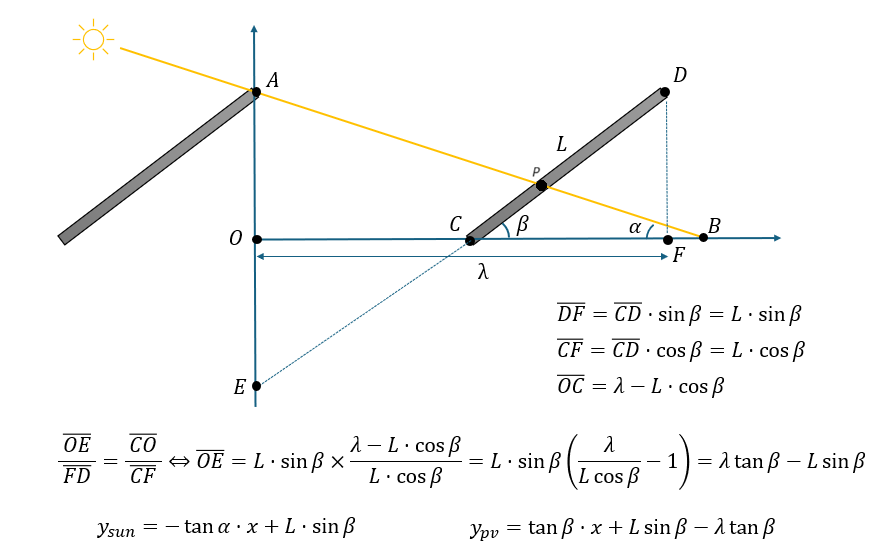

In [65]:
Image(filename='img/row_shadings_diagram.png', width=400)

We can easily write the coordinates formula for each of the points identified:

$ A = (0,L\sin{\beta}) $

$ B = (\frac{L\sin{\beta}}{\tan{\alpha}},0) $

$ C = (\lambda-L\cos{\beta}, 0) $

$ D = (\lambda,L\sin{\beta}) $

$ E = (0,L\sin{\beta}-\lambda\tan{\beta}) $

$ F = (\lambda,0) $

With these points defined, it becomes easy to derive the function of each line. Our goal is to find the intersection point.

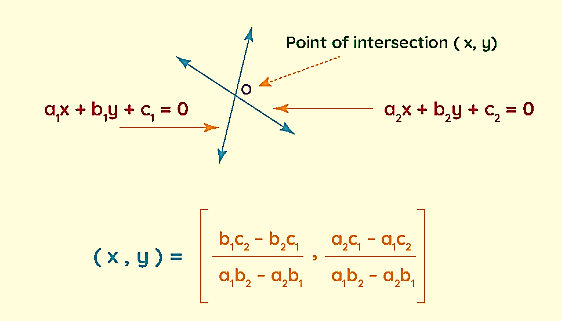

In [66]:
Image(filename='img/intersection_point.png', width=400)

3.578455087190813 0.15954165617767274
0.2853070115651397


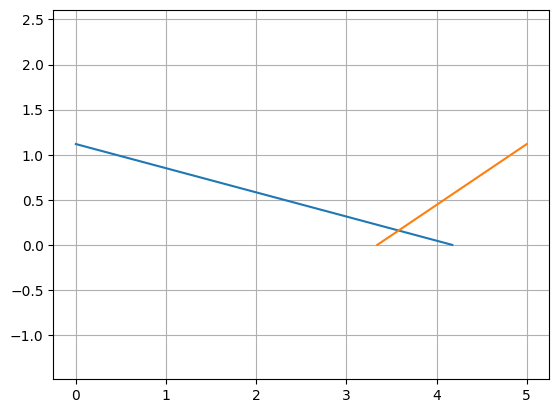

In [67]:
class Point2D:
	def __init__(self, x: float, y: float) -> None:
		self.x = x
		self.y = y

def calc_slope(p1: Point2D, p2: Point2D) -> float:
	# slope = m = dy/dx = (y2-y1) / (x2-x1)
	return (p2.y-p1.y) / (p2.x-p1.x)

def calc_intercept(p1: Point2D, p2: Point2D) -> float:
	# y_intercept = y0 = y1 - slope*x1
	slope = calc_slope(p1, p2)
	return p1.y - slope*p1.x

class Line2D:
	def __init__(self, slope: float, y_intercept: float) -> None:
		self.slope = slope
		self.y_intercept = y_intercept

	def evaluate(self, x: float) -> float:
		return self.slope*x + self.y_intercept

def intersection(l1: Line2D, l2: Line2D) -> tuple:
	a1 = -l1.slope
	b1 = 1
	c1 = -l1.y_intercept
	a2 = -l2.slope
	b2 = 1
	c2 = -l2.y_intercept
	denom = (a1*b2 - a2*b1)
	x = (b1*c2 - b2*c1) / denom
	y = (a2*c1 - a1*c2) / denom
	return x,y

def calc_distance(p1: Point2D, p2: Point2D) -> float:
	return np.sqrt((p2.y-p1.y)**2 + (p2.x-p1.x)**2)

L = 2 # panel length in meters
beta = 34 *np.pi/180 # panel inclination in radians
lmbda = 5 # row pitch in meters
alpha = 15 *np.pi/180 # solar altitude in radians

A = Point2D(0, L*np.sin(beta))
B = Point2D(L*np.sin(beta)/np.tan(alpha), 0)
C = Point2D(lmbda-L*np.cos(beta), 0)
D = Point2D(lmbda, L*np.sin(beta))
E = Point2D(0, L*np.sin(beta)-lmbda*np.tan(beta))
F = Point2D(lmbda, 0)

l_sun = Line2D(-np.tan(alpha), A.y)
x_sun = np.linspace(0, B.x, 10)
y_sun = l_sun.evaluate(x_sun)

l_pv = Line2D(np.tan(beta), E.y)
x_pv = np.linspace(C.x, F.x, 10)
y_pv = l_pv.evaluate(x_pv)

P = Point2D(*intersection(l_sun, l_pv))
print(P.x, P.y)
print(calc_distance(C, P))

import matplotlib.pyplot as plt

plt.plot(x_sun, y_sun)
plt.plot(x_pv, y_pv)
plt.grid()
plt.axis('equal')
plt.show()


The code above is not finished, but it could be. The method is valid.

The reason why I skipped it (at least for now) is because I realized that it is much easier to use the sine rule.

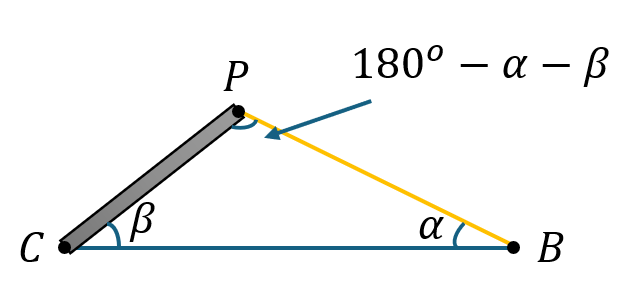

In [68]:
Image(filename='img/sine_rule.png', width=400)

Because we defined well all points we have:

$$ CB = B - C = \frac{L\sin{\beta}}{\tan{\alpha}} + L\cos{\beta} - \lambda $$

And applying the sine rule:

$$ \frac{\overline{CP}}{\sin{\alpha}} = \frac{\overline{CB}}{\sin{(180\degree - \alpha - \beta)}}  = \frac{\overline{CB}}{\sin{(\alpha + \beta)}} $$

In [69]:
CB = calc_distance(C, B)
CP = CB * np.sin(alpha) / np.sin(alpha+beta)
print(CP)

0.28530701156514005


## Types of structures

We can have fixed structures, single-axis trackers and dual-axis trackers. However, in theory we could have any number of axes and degrees of freedom, and the tracking system / algorithm should always guarantee that the sun is as perpendicular to the panels as possible. In other words, our goal is to find the panel orientation such that the incidence angle is minimized.

$$ \min{ \theta_{inc}{(\vec{r})} } $$

This would be for a generic case. For the standard cases of mounts in the north hemisphere, we can make simpler derivations.